In [1]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct

Base PT2 system parameters

In [2]:
wn = 5
zeta = 0.3

Base second-order system

In [3]:
num_base = [wn**2]
den_base = [1, 2*zeta*wn, wn**2]

G_base = ct.tf(num_base, den_base)

Add left-half-plane zero at s = -3

In [4]:
z_lhp = 3
num_lhp = [1, z_lhp]  # (s + 3)

G_lhp = ct.tf(num_lhp, [1]) * G_base

Add right-half-plane zero at s = +3

In [5]:
z_rhp = 3
num_rhp = [1, -z_rhp]  # (s - 3)

G_rhp = ct.tf(num_rhp, [1]) * G_base

Move RHP zero closer to origin

In [6]:
G_rhp_near_origin = ct.tf([1, -1], [1]) * G_base  # (s - 1)

Normalize DC gain for comparison

In [7]:
def normalize_dc_gain(sys):
    dc = ct.dcgain(sys)
    return sys / dc

G_base = normalize_dc_gain(G_base)
G_lhp  = normalize_dc_gain(G_lhp)
G_rhp  = normalize_dc_gain(G_rhp)
G_rhp_near_origin = normalize_dc_gain(G_rhp_near_origin)

Time vector

In [8]:
t = np.linspace(0, 5, 1000)

Step responses

In [9]:
t_base, y_base = ct.step_response(G_base, t)
t_lhp,  y_lhp  = ct.step_response(G_lhp, t)
t_rhp,  y_rhp  = ct.step_response(G_rhp, t)
t_rhp_near_origin, y_rhp_near_origin = ct.step_response(G_rhp_near_origin, t)

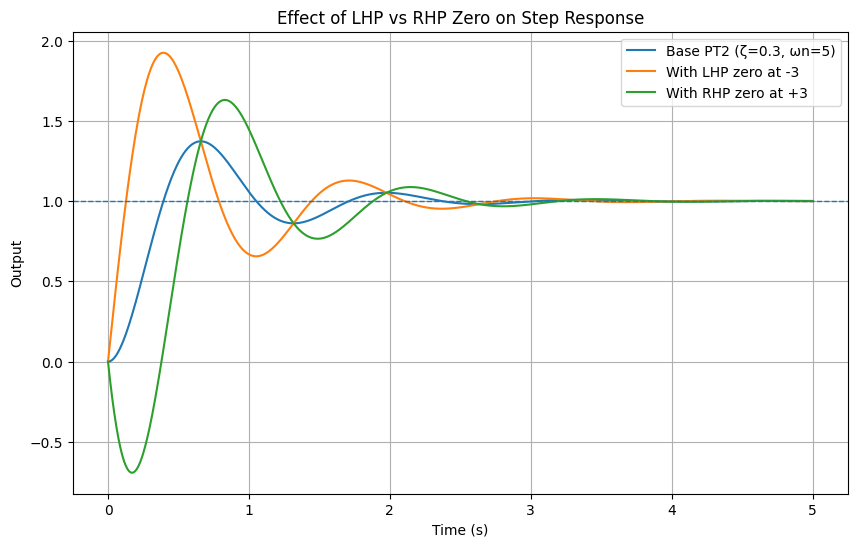

In [10]:
plt.figure(figsize=(10,6))

plt.plot(t_base, y_base, label="Base PT2 (ζ=0.3, ωn=5)")
plt.plot(t_lhp,  y_lhp,  label="With LHP zero at -3")
plt.plot(t_rhp,  y_rhp,  label="With RHP zero at +3")

plt.axhline(1, linestyle='--', linewidth=1)
plt.xlabel("Time (s)")
plt.ylabel("Output")
plt.title("Effect of LHP vs RHP Zero on Step Response")
plt.legend()
plt.grid(True)
plt.show()

Base PT2
- Underdamped
- About 37% overshoot (since ζ=0.3)

With LHP zero
- Faster initial rise
- Larger overshoot
- Sharper transient
- Still minimum-phase

With RHP zero
- Initial dip (inverse response)
- Then rises to 1
- More sluggish effective behavior
- Non-minimum phase

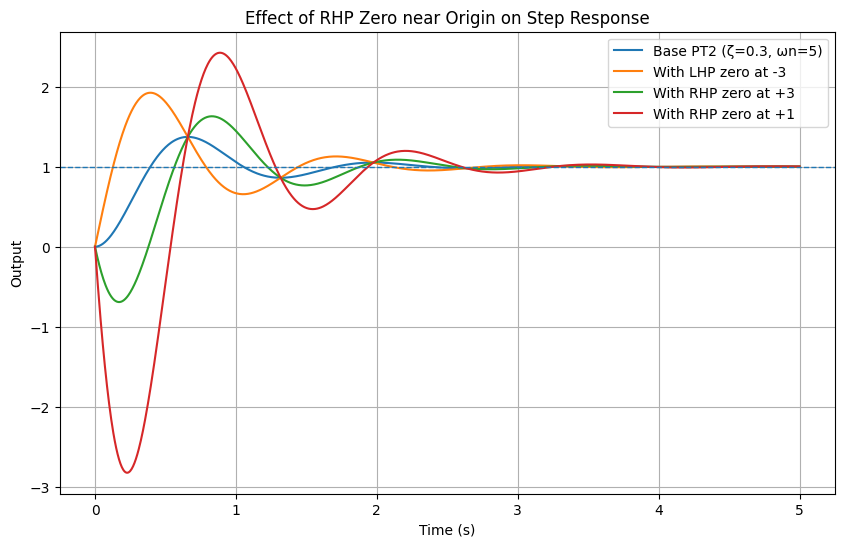

In [11]:
plt.figure(figsize=(10,6))

plt.plot(t_base, y_base, label="Base PT2 (ζ=0.3, ωn=5)")
plt.plot(t_lhp,  y_lhp,  label="With LHP zero at -3")
plt.plot(t_rhp,  y_rhp,  label="With RHP zero at +3")
plt.plot(t_rhp_near_origin,  y_rhp_near_origin,  label="With RHP zero at +1")

plt.axhline(1, linestyle='--', linewidth=1)
plt.xlabel("Time (s)")
plt.ylabel("Output")
plt.title("Effect of RHP Zero near Origin on Step Response")
plt.legend()
plt.grid(True)
plt.show()

Pole-zero maps

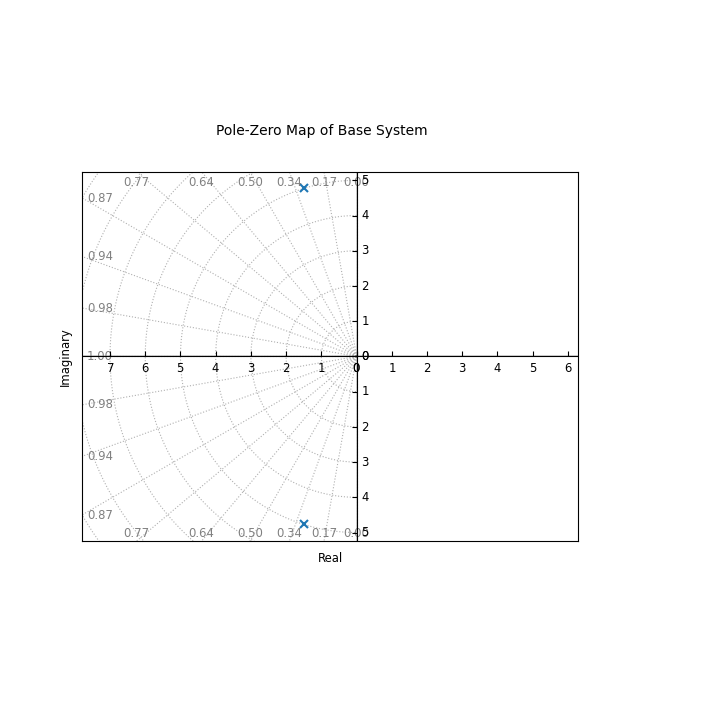

In [12]:
ct.pzmap(G_base, grid=True, title="Pole-Zero Map of Base System")

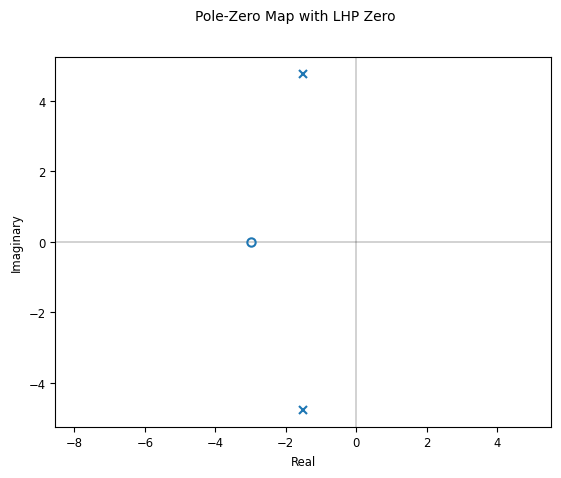

In [13]:
ct.pzmap(G_lhp, grid=False, title="Pole-Zero Map with LHP Zero")

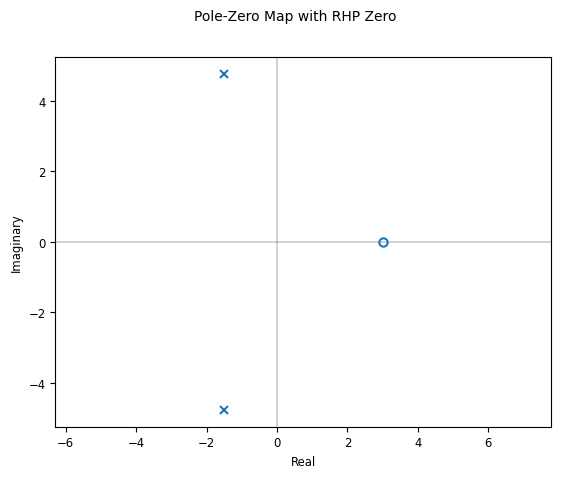

In [14]:
ct.pzmap(G_rhp, grid=False, title="Pole-Zero Map with RHP Zero")

Bode plots

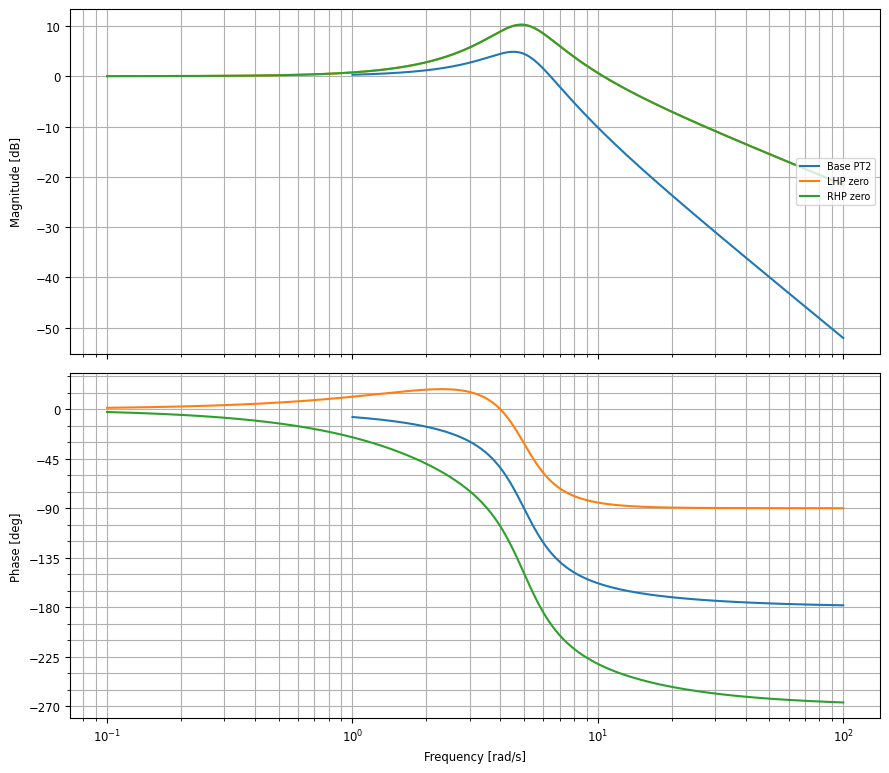

In [15]:
plt.figure(figsize=(9,8))

ct.bode_plot(G_base, dB=True, Hz=False, grid=True, label="Base PT2")
ct.bode_plot(G_lhp, dB=True, Hz=False, grid=True, label="LHP zero", wrap_phase=True)
ct.bode_plot(G_rhp, dB=True, Hz=False, grid=True, label="RHP zero")